In [1]:
import os
import cv2
import keras
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import model_from_json
from skimage.util import random_noise
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


print(tf.__version__)


2.15.0


In [2]:
PATH = r'B:\Programs\ML\Major\data\train_cleaned'

PATH2 = r'B:\Programs\ML\Major\data\train'

directory = os.listdir(PATH)
# print(directory)

X_train = []
y_train = []
for file in directory:
    currentFile = os.path.join(PATH, file)
    # print(folders)
    img = cv2.imread(currentFile, 0)
    try:
        img = cv2.resize(img, (256, 256))
        X_train.append(img)
    except:
        pass

directory = os.listdir(PATH2)
y_train = []
for file in directory:
    currentFile = os.path.join(PATH2, file)
    #     print(folders)
    img = cv2.imread(currentFile, 0)
    try:
        img = cv2.resize(img, (256, 256))
        y_train.append(img)
    except:
        pass

(144, 256, 256)
(144, 256, 256)
(144, 256, 256)
(144, 256, 256)
(144, 256, 256)
(144, 256, 256, 1)
(144, 256, 256, 1)
(144, 256, 256, 1)


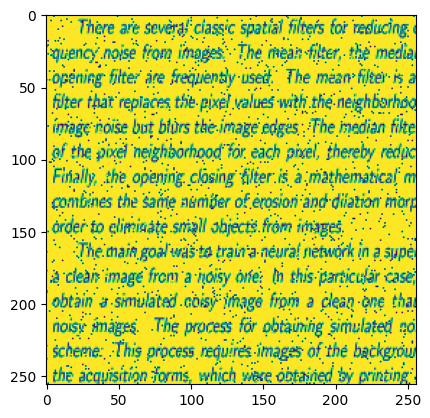

In [3]:
plt.imshow(X_train[56])

X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)

print(X_train.shape)

noise_img = random_noise(X_train[56], mode='s&p', amount=0.05)
noise_img = np.array(255 * noise_img, dtype='uint8')

# Display the noise image
plt.imshow(noise_img)

noise = []
for img in X_train:
    noise_img = random_noise(img, mode='s&p', amount=0.3)
    noise_img = np.array(255 * noise_img, dtype='uint8')
    noise.append(noise_img)

noise = np.array(noise)

print(noise.shape)

y_train = y_train / 255.0

X_train = X_train / 255.0

print(y_train.shape)

shape = X_train.shape
print(X_train.shape)

X_train = X_train.reshape(shape[0], shape[1], shape[2], 1)
noise = noise.reshape(shape[0], shape[1], shape[2], 1)
y_train = y_train.reshape(shape[0], shape[1], shape[2], 1)

print(X_train.shape)

print(noise.shape)

print(y_train.shape)




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 Conv_1 (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 MaxPool_1 (MaxPooling2D)    (None, 128, 128, 64)      0         
                                                                 
 Conv_2 (Conv2D)             (None, 128, 128, 64)      36928     
                                                                 
 MaxPool_2 (MaxPooling2D)    (None, 64, 64, 64)        0         
                                                                 
 Conv_3 (Conv2D)             (None, 64, 64, 64)        36928     
                                                                 
 UpSample_1 (UpSampling2D)   (None, 128, 128, 64)      0  

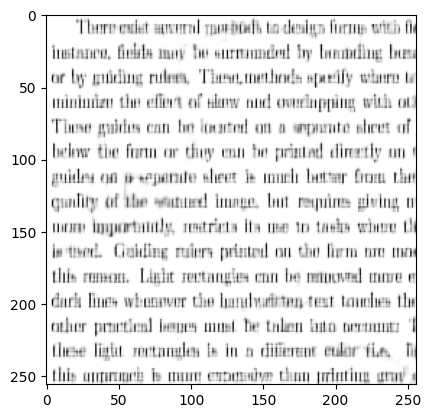

In [4]:

"""noise=noise/255"""

model = Sequential()

input_img = keras.Input(shape=(256, 256, 1))
# encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv_1')(input_img)
x = MaxPooling2D((2, 2), padding='same', name='MaxPool_1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv_2')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='MaxPool_2')(x)
# decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv_3')(encoded)
x = UpSampling2D((2, 2), name='UpSample_1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv_4')(x)
x = UpSampling2D((2, 2), name='UpSample_2')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adamax', loss='binary_crossentropy')
autoencoder.summary()

autoencoder.fit(y_train, X_train,
                epochs=200,
                batch_size=15,
                shuffle=True)

print(noise.shape)

noise_img = random_noise(y_train[87], mode='s&p', amount=0.05)
noise_img = np.array(255 * noise_img, dtype='uint8')
# noise_img = cv2.add(X_train[56],gauss,dtype=cv2.CV_64F)

print(noise_img.shape)

img = autoencoder.predict(noise[6].reshape(1, 256, 256, 1))
plt.imshow(noise[6].reshape(256, 256))

# img=img*255.0
img = img.reshape(256, 256)
plt.imshow(img)

plt.imshow(X_train[6].reshape(256, 256))

json_model = autoencoder.to_json()
json_file = open(r'B:\Major\code\newModel\textOriginalNoiseEncoder.json', 'w')
json_file.write(json_model)

# saving model weights
autoencoder.save_weights(r'B:\Major\code\newModel\textOriginalNoiseEncoder_weights.h5')

# loading weights of a keras model

json_file = open(r'B:\Major\code\newModel\textOriginalNoiseEncoder.json', 'r')
json_model = model_from_json(json_file.read())
json_model.load_weights(r'B:\Major\code\newModel\textOriginalNoiseEncoder_weights.h5')

index = 42

img = json_model.predict(y_train[index].reshape(1, 256, 256, 1))
plt.imshow(y_train[index].reshape(256, 256), cmap='gray')

plt.imshow(img.reshape(256, 256), cmap='gray')

1/1 [==============================] - 0s 82ms/step


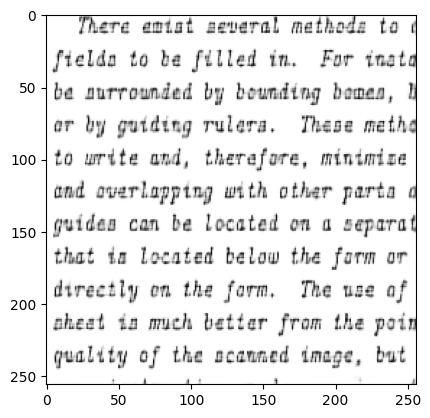

In [8]:
json_file = open(r'B:\Major\code\newModel\textOriginalNoiseEncoder.json', 'r')
json_model = model_from_json(json_file.read())
json_model.load_weights(r'B:\Major\code\newModel\textOriginalNoiseEncoder_weights.h5')

index = 20

img = json_model.predict(y_train[index].reshape(1, 256, 256, 1))
plt.imshow(y_train[index].reshape(256, 256), cmap='gray')

plt.imshow(img.reshape(256, 256), cmap='gray')